

# Time Series for % Increasing Price

reference: 
- https://www.machinelearningplus.com/time-series/time-series-analysis-python/
- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

# Import Libray and Open Data

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
df = pd.read_csv('Data/DC_Prop_Residential_TimeSeries.csv', index_col = 'Unnamed: 0', parse_dates = ['SALEDATE'])
df.head(2)

,SALEDATE,PRICE
0,2003-11-25,1095000.0
2,2016-06-21,2100000.0


# Preprocessing

## Prepare Column

In [3]:
df = df.sort_values(by='SALEDATE', ascending= True)

In [4]:
df['YEAR'] = df['SALEDATE'].dt.year
df['SOURCE'] = 'Condominium'
df = df.rename_axis(None)

## Aggregate Price Per Year

In [5]:
df_r = pd.crosstab(index=df['YEAR'], 
            columns=[df['SOURCE']], 
            values=df['PRICE'],
            aggfunc='mean')
df_r = df_r.rename_axis(None)
df_r = df_r.reset_index()
df_r = df_r.rename(columns={'Condominium' : 'PRICE_AVG', 'index' : 'YEAR'})

## Repair Typo Price

In [6]:
df_r.iloc[6,1] = df_r.iloc[6,1] / 10

# Plot Price by Time Series

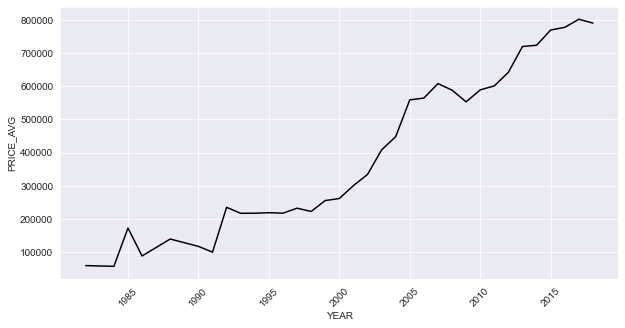

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
sns.set_style("darkgrid")
sns.lineplot(x='YEAR', y='PRICE_AVG', data = df_r, color = 'black', legend='full', sizes= 1)

plt.xticks(rotation=45)
plt.show()

In [9]:
df_r

SOURCE,YEAR,PRICE_AVG
0,1982,60000.000000
1,1984,57750.000000
2,1985,173000.000000
3,1986,89000.000000
4,1988,140000.000000
5,1990,117833.333333
6,1991,100496.666667
7,1992,235341.982684
8,1993,217414.979626
9,1994,217566.135402


# Calculate % Increase Price Per Year

In [ ]:
price = df_r['PRICE_AVG']
percent_increase = []
for i in range(len(price)-1):
  increase = np.abs(price[i+1] - price[i])/price[i]
  percent_increase.append(increase)


In [ ]:
avg_percent_increase = np.median(percent_increase)*100
print("Average % Increase Price Per Year", avg_percent_increase, "%")

Average % Increase Price Per Year 6.815904929872753 %
